In [4]:
import sys
import os
import yaml
from PIL import Image
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))

In [6]:
# Импортируем функцию для определения корня проекта
sys.path.append(os.path.abspath("../scripts"))
from utils import get_project_root

# Добавляем корень проекта в sys.path
sys.path.append(get_project_root())

project_root = get_project_root()
params_path = os.path.join(project_root, "params.yaml")

from scripts.utils import get_project_paths

with open(params_path, "r") as f:
    params = yaml.safe_load(f)
    paths = get_project_paths()

# Изучение трансфера модели. 

## Часть1. Обучение базовой модели minst
Обучаем на простой нейросети. Урезали кол-во классов классификации до 5.

### Загружаем данные после обучения

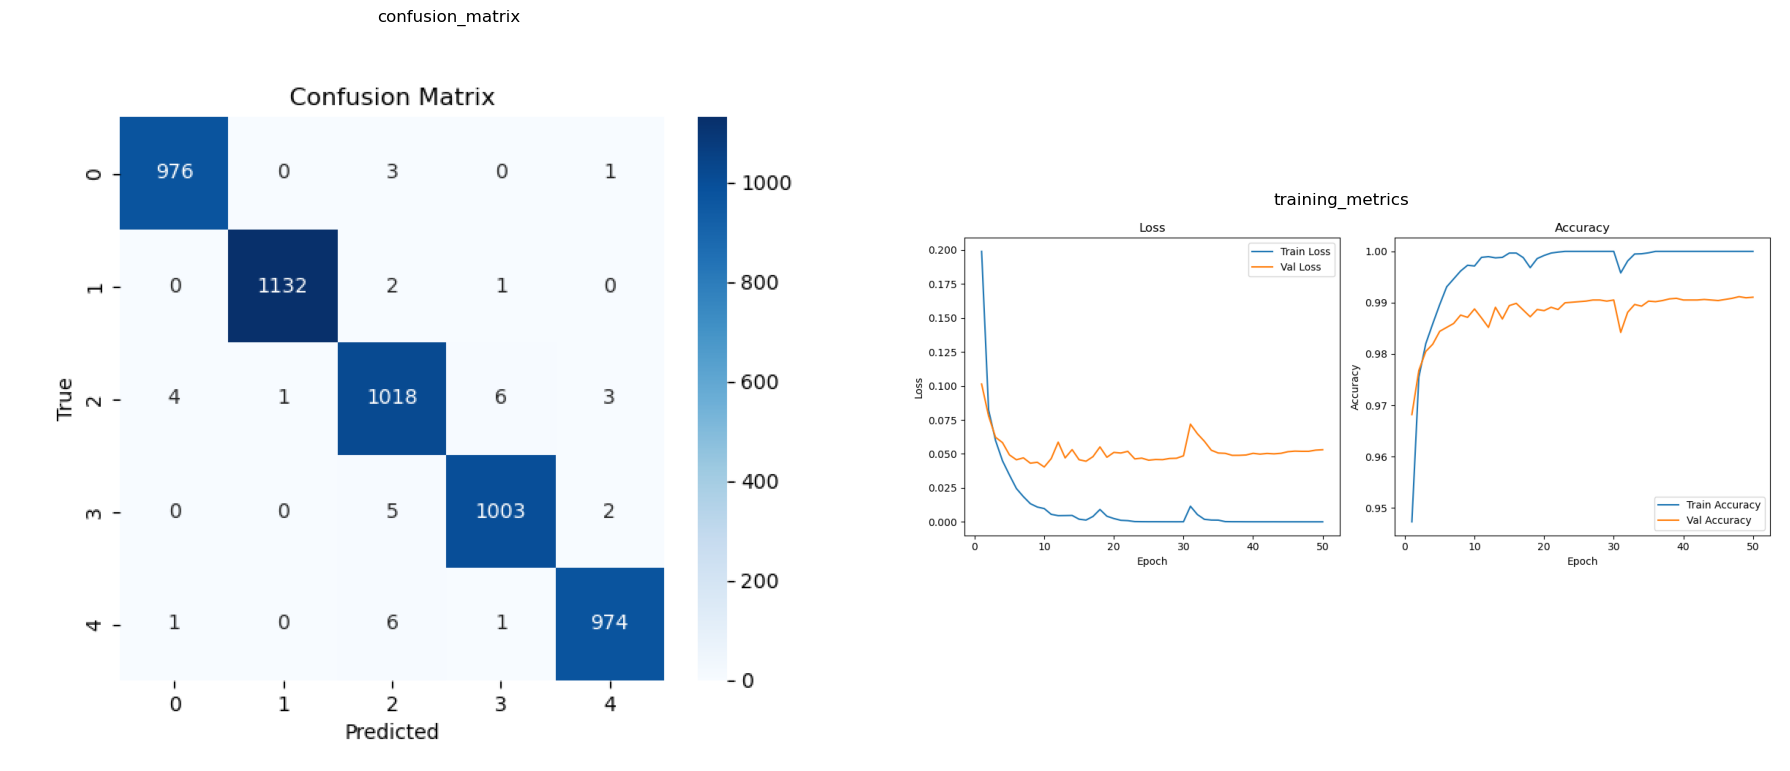

In [11]:
img1 = Image.open(paths['image_dir']/"mnist_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"mnist_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()



### Вывод: Графики обучения терпимые. Матрица ошибок более чем хорошая.Будем пробовать трасфернуть эту матрицу в fashion_mnist

# Часть 2. fashion_mnist

## 2.1 Транфер модели без заморозки слоев

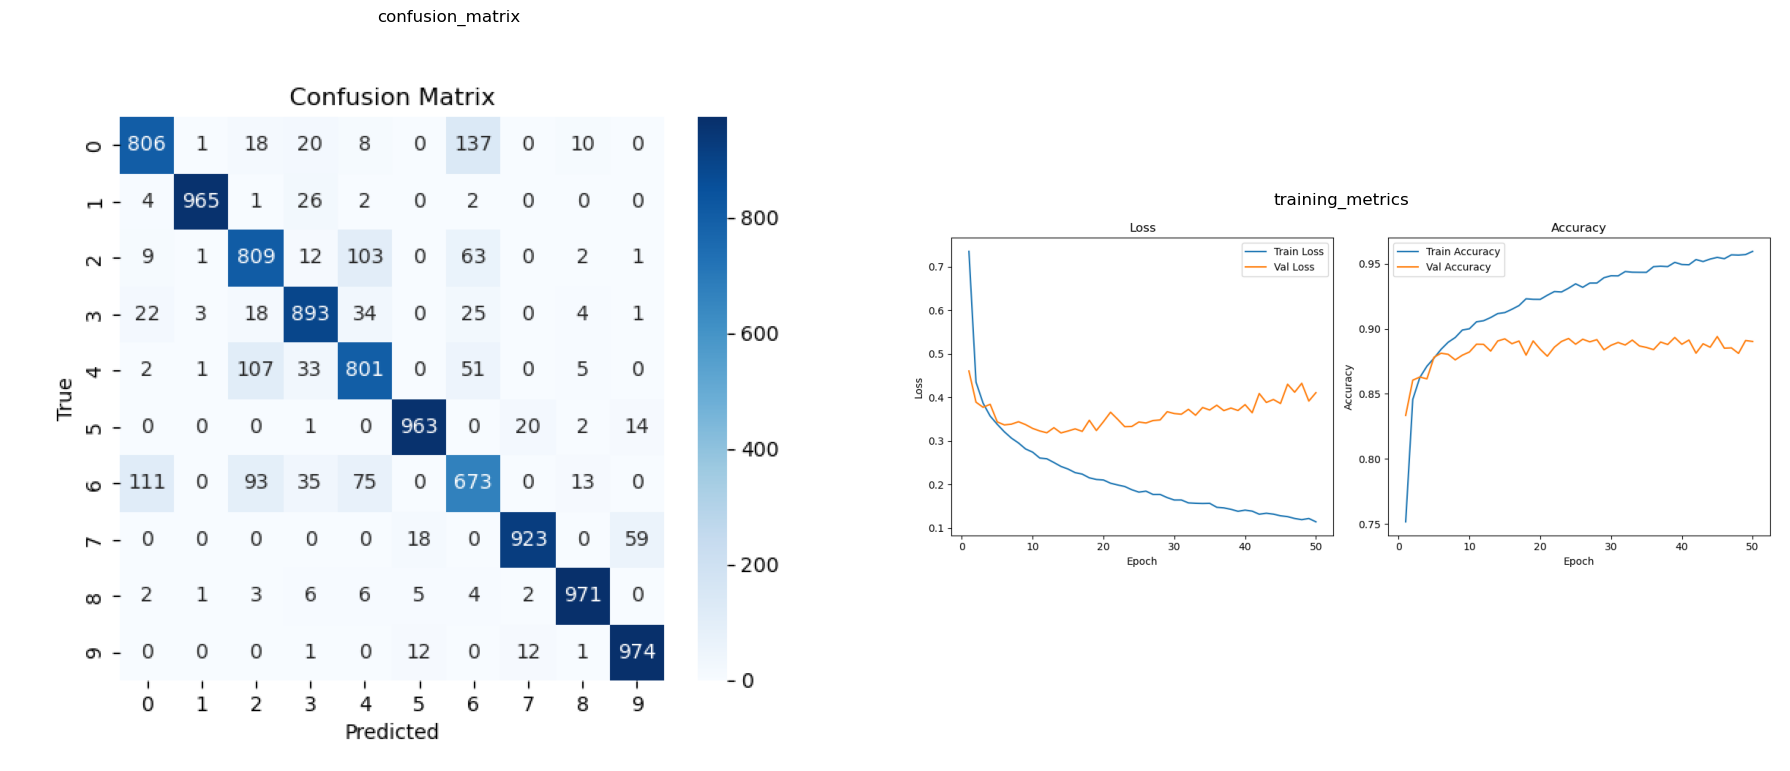

In [10]:
img1 = Image.open(paths['image_dir']/"mnist_nofrease_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"mnist_fash_no_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()


val_accuracy
0.8903333333333333

### Вывод: Графики обучения терпимые. Матрица ошибок  тоже.Особенно при учете что базовуб модель мы принудительно урезали (до 5 классов)

## 2.2 Транфер модели с заморозкой слоев

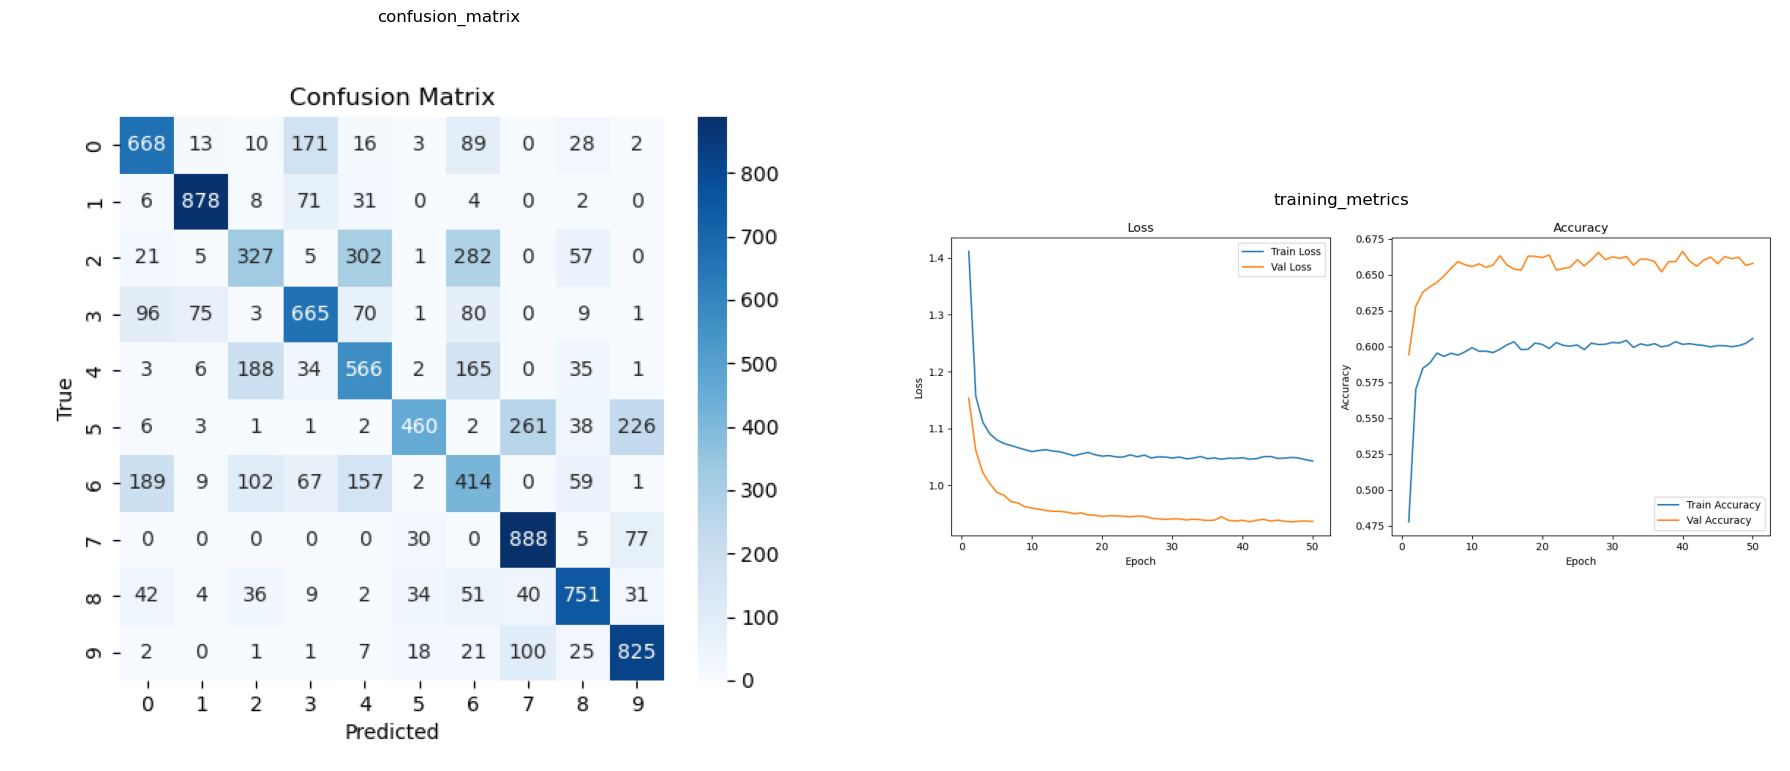

In [12]:
img1 = Image.open(paths['image_dir']/"mnist_full_frease_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"mnist_full_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

val_accuracy
0.6578888888888889

### Вывод: С одно стороны графики обучания лучше чем без заморозки слоев. Но матрица ошибко хуже, как и собственно точность

## 2.3 Транфер модели с заморозкой слоев и их разморозкой на середине обучения

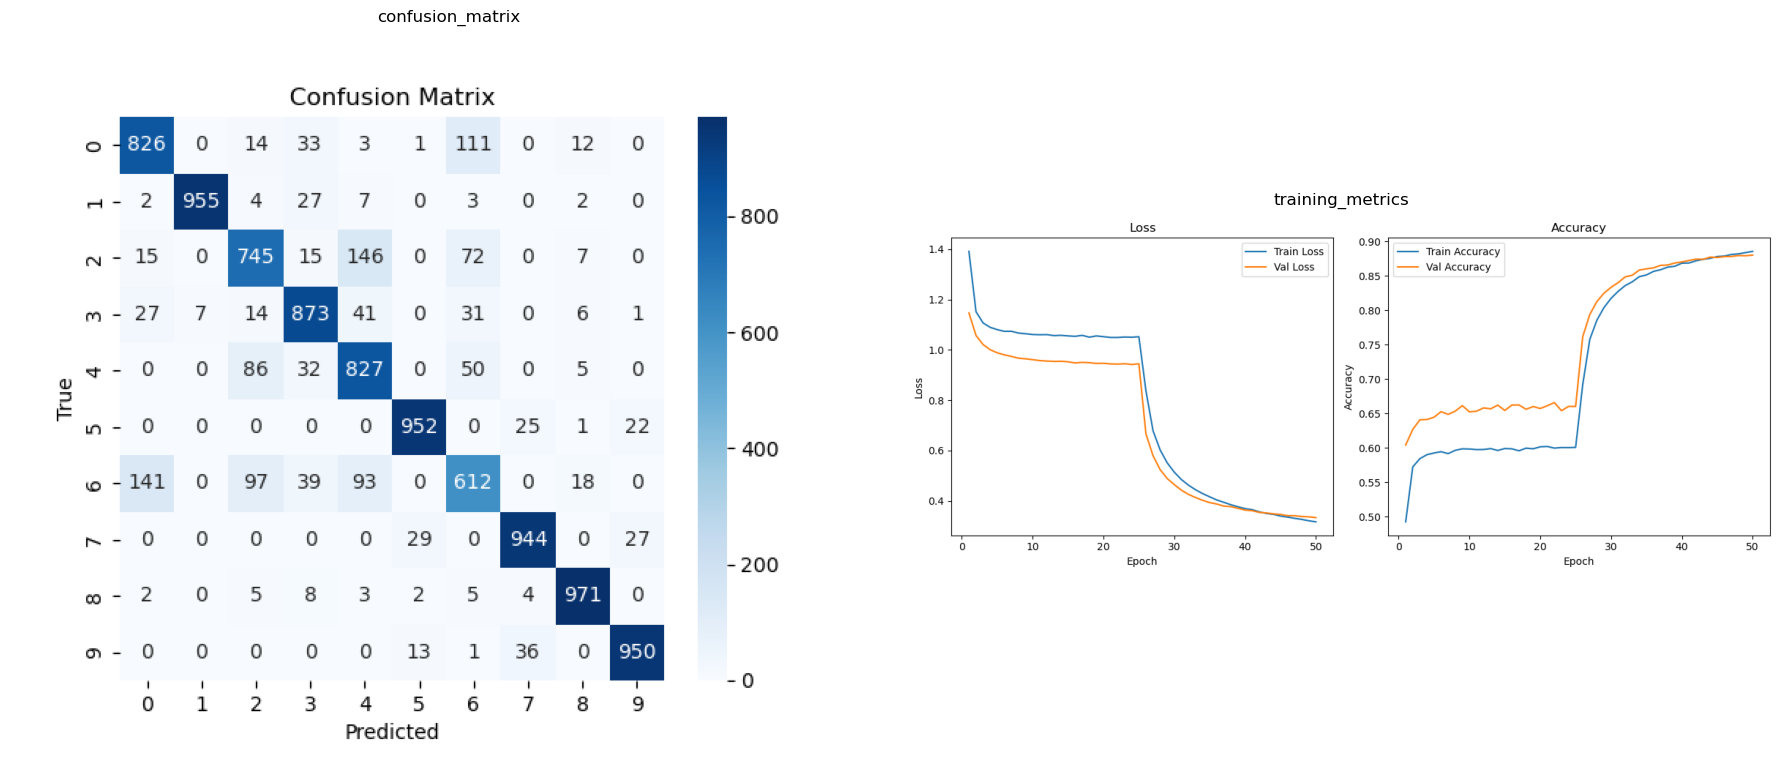

In [13]:
img1 = Image.open(paths['image_dir']/"mnist_part_frease_confusion_matrix.png") 
img2 = Image.open(paths['image_dir']/"mnist_part_frease_training_metrics.png") 

# Создаем фигуру с 1 строкой и 2 столбцами
fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # (рядов, колонок)

# Отображаем первое изображение
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title("confusion_matrix")

# Отображаем второе изображение
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title("training_metrics")

# Показываем все вместе
plt.tight_layout()
plt.show()

val_accuracy
0.8802222222222222

🔍 1. Без заморозки (val_acc ≈ 0.89, но растущий val_loss)
✅ Почему высокая точность:
Прекрасно инициализированные веса от MNIST, и модель сразу быстро обучается на Fashion-MNIST.
Так как веса изменяемы, модель адаптируется к фичам одежды лучше, чем если бы слои были заморожены.
Судя по всему это хорошо работает, если исходный и целевой датасет похожи (что и есть в случае MNIST ↔️ Fashion-MNIST).

⚠️ Почему растёт val_loss, несмотря на стабильный val_accuracy:
Скорее всего, модель становится излишне уверенной в своих предсказаниях: предсказывает правильный класс, но с очень высокой уверенностью (низкая энтропия), что даёт высокий loss.
Это классическое переобучение: accuracy остаётся стабильной, но loss растёт, потому что модель слишком точно подгоняет тренировочные данные.

🧊 2. Полностью замороженная модель (val_acc ≈ 0.66)
✅ Почему стабильные графики:
Невозможно "переобучиться", потому что веса не изменяются.
Единственное, что мы обучаем — это новый выходной слой.

❌ Почему низкая точность:
Веса MNIST не идеально подходят к Fashion-MNIST. Да, цифры и одежда — оба серые картинки 28×28, но паттерны очень разные (обувь, платья и т.д. vs. цифры).
Без возможности дообучения, модель не может переиспользовать фичи по-новому, и мы теряем точность.

🔄 3. Заморозка + разморозка на середине (val_acc ≈ 0.88)
✅ Почему это компромисс:
Первые эпохи идут как предобученная модель + обучение нового выхода — мягкий старт, нет перезаписывания полезных фич.
После разморозки даем модели возможность тонко подстроиться под Fashion-MNIST, что и ускоряет сходимость.
🔥 Почему это почти так же хорошо, как полностью обучаемая:
Модель успевает "сфокусироваться" на новой задаче (через замороженный период), а потом учится до уровня полного fine-tuning’а, но более стабильно и без начального переобучения.